# Importing Libaries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.metrics import r2_score


# Read and prepare Data

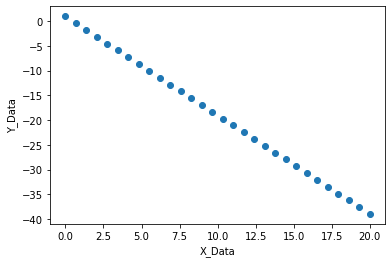

In [2]:
X_Data = np.linspace(0 , 20 , 30)
Y_Data = -2*X_Data +1
X_Data , Y_Data = sk.utils.shuffle(X_Data , Y_Data)
plt.scatter(X_Data , Y_Data)
plt.xlabel("X_Data")
plt.ylabel("Y_Data")
plt.show()

In [3]:
feture = np.concatenate((np.ones(len(X_Data)).reshape( len(X_Data), 1) 
                         , X_Data.reshape(len(X_Data) , 1))  , axis = 1)


# Stochastic GD

In [38]:
theta = np.array([0 , 0 ])
alpha = 0.01
Data_length = len(X_Data)
Epoch = 100

Not_first_iter = 0

Jtheta = []
theta_zero = []
theta_one = []
Max_no_iter = 50

for j in range(Epoch):
   
    if Not_first_iter > 1 and np.abs(Jtheta[-1]-Jtheta[-2]) < 0.0001:
            break
    Not_first_iter+=1   
    
    theta_zero.append(theta[0])
    theta_one.append(theta[1])
    
    for i in range(Data_length):
        Y= np.dot(theta ,feture[i].T)
        Error = Y - Y_Data[i]
        
        if i == Data_length-1:
            Jtheta.append((alpha/2)*(np.dot( Error , Error)))
        Gradt = (np.dot( Error , feture[i]))    
        theta = theta - alpha*Gradt
        
print(theta)  

[ 0.65548014 -1.97215677]


# Data Score

In [39]:
Y= np.dot(theta ,feture.T)
print(r2_score(Y , Y_Data))

0.9997691626918672


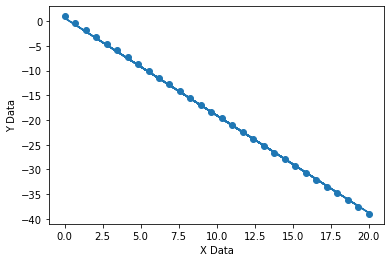

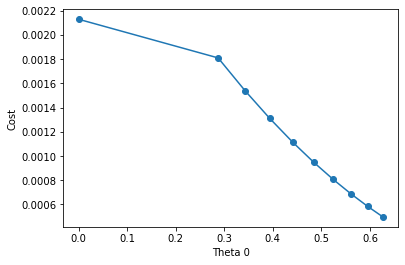

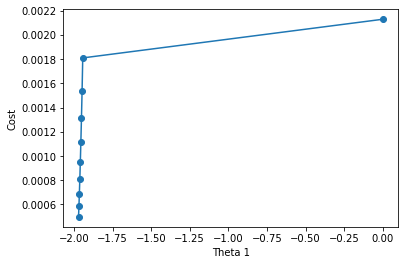

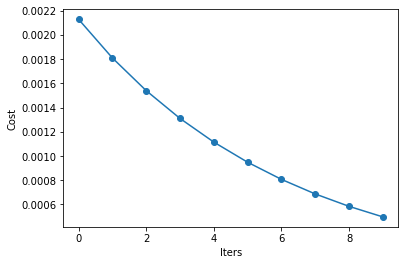

In [40]:
plt.scatter(X_Data , Y_Data)
plt.plot(X_Data, theta[0]+ X_Data * theta[1]) 
plt.xlabel("X Data")
plt.ylabel("Y Data")
plt.show()

plt.plot(theta_zero ,Jtheta ,'-o') 
plt.xlabel("Theta 0")
plt.ylabel("Cost")
plt.show()

plt.plot(theta_one , Jtheta , '-o')
plt.xlabel("Theta 1")
plt.ylabel("Cost")
plt.show()


plt.plot( Jtheta , '-o')
plt.xlabel("Iters")
plt.ylabel("Cost")
plt.show()

# Generate Batches

In [41]:
def Generate_Batches(Data  , batch_size):
    Batches = []
    M = 0
    while(M+batch_size <= len(Data)):
        Batches.append(Data[M : M+batch_size])
        M +=batch_size-1
    Batches.append(Data[M : ]) 
    return Batches

# Mini-Batch GD

In [55]:
theta = np.array([0 , 0 ])
alpha = 0.0001
Data_length = len(X_Data)
Epoch = 100

Not_first_iter =0

Jtheta = []
theta_zero = []
theta_one = []

Max_no_iter = 4000
Batch_Size = 3
feture_Mini = Generate_Batches(feture , Batch_Size)
Y_mini = Generate_Batches(Y_Data , Batch_Size)

for j in range(Max_no_iter):
    for i in range(len(feture_Mini)):
        Y= np.dot(theta ,feture_Mini[i].T)
        Error_mini = Y-Y_mini[i]
        
        if (Not_first_iter >1 and np.abs(Jtheta[-1]-Jtheta[-2]) < 0.00000001):
            break
        Not_first_iter +=1
        
        theta_zero.append(theta[0])
        theta_one.append(theta[1])
        Jtheta.append((alpha/2*len(feture_Mini))*(np.dot(Error_mini ,Error_mini)))
        
        Gradt_mini = np.dot( Error_mini , feture_Mini[i]) 
        theta = theta - (alpha/len(feture_Mini))*Gradt_mini
        
print(theta)   

[ 0.15181223 -1.9370927 ]


# Data Score

In [56]:
Y= np.dot(theta ,feture.T)
print(r2_score(Y , Y_Data))

0.9985862798569748


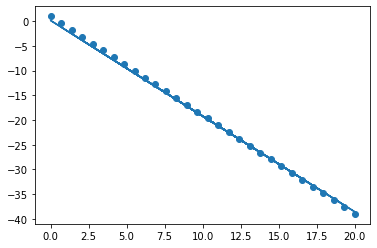

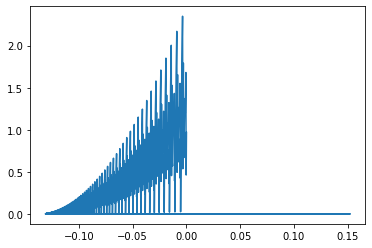

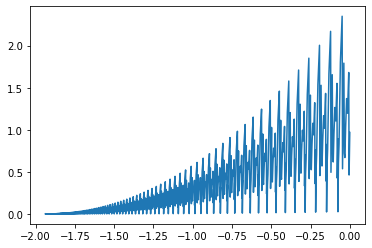

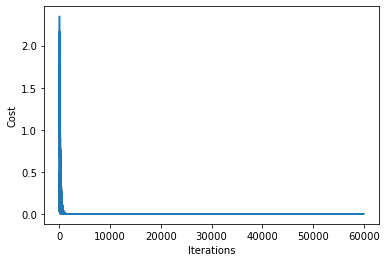

In [57]:
plt.scatter(X_Data , Y_Data)
plt.plot(X_Data, theta[0]+ X_Data * theta[1]) 
plt.show()

plt.plot(theta_zero ,Jtheta ) 
plt.show()

plt.plot(theta_one , Jtheta ) 
plt.show()

plt.xlabel("Iterations" )
plt.ylabel("Cost")
plt.plot( Jtheta ) 
plt.show()

# MultiVariate Data

# Read and Explore Data

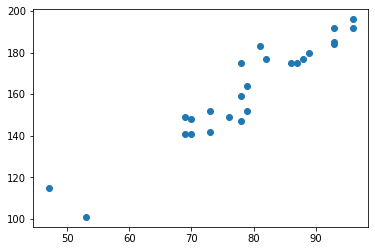

In [58]:
Data_points = np.genfromtxt("MultipleLR.csv" ,  delimiter= ',')
X_Data = Data_points[:,0:3]
Y_Data = Data_points[:,3]
X_Data , Y_Data = sk.utils.shuffle(X_Data , Y_Data)
plt.scatter(X_Data[:,0] , Y_Data)
plt.show()

# MultiVariate Algorithm

In [59]:
feture = np.concatenate((np.ones(len(X_Data)).reshape( len(X_Data), 1) 
                         , X_Data.reshape(len(X_Data) , 3))  , axis = 1)

In [73]:
theta = np.array([0 , 0 ,0 , 0])
alpha = 0.0001
Data_length = len(X_Data)

Epoch = 10000
Not_first_iter = 0
Jtheta = []

for i in range(Epoch):
    Y= np.dot(theta ,feture.T)
    Error = Y-Y_Data
    if (Not_first_iter > 1 and np.abs(Jtheta[-1]-Jtheta[-2]) < 0.00000001):
        break
    Not_first_iter +=1
    
    Jtheta.append((alpha/2)*(np.dot( Error , Error)/Data_length))
    
    Gradt = (np.dot( Error , feture) /Data_length)
    theta = theta - alpha*Gradt
print(theta)    

[4.77513978e-04 4.13176394e-01 5.16176302e-01 1.08534110e+00]


# Data Score

In [74]:
Y= np.dot(theta ,feture.T)
print(r2_score(Y , Y_Data))

0.9881991055819944


# Just Trying Batch Momentum based With Multivariate

In [83]:
theta = np.array([0 , 0 , 0 ,0 ])
alpha = 0.0001
Data_length = len(X_Data)
Epoch = 100

Not_first_iter = 0
Jtheta = []
theta_zero = []
theta_one = []

Max_no_iter = 10000

Gamma = 0.9
Vt = 0

for i in range(Max_no_iter):
    Y= np.dot(theta ,feture.T)
    Error = Y- Y_Data
    
    if Not_first_iter >1 and np.abs(Jtheta[-1]-Jtheta[-2]) < 0.000001:
            break
    Not_first_iter+=1
    
    theta_zero.append(theta[0])
    theta_one.append(theta[1])
    Jtheta.append((alpha/2)*(np.dot( Error , Error)/Data_length))
    
    Gradt = (np.dot( Error , feture) /Data_length)
    
    Vt = Gamma*Vt + alpha*Gradt
    theta = theta - Vt
    
    
    
print(theta)      

[8.63261828e-04 4.03611864e-01 5.12027357e-01 1.09945818e+00]


# Data Score

In [84]:
Y= np.dot(theta ,feture.T)
print(r2_score(Y , Y_Data))

0.9882447668245228
